# Evaluación de modelos

Modelos de clasificación:

1. Accuracy
2. Precicision(P)
3. F1 score(F1)
4. Area under the ROC (Receiving Operating Characteristic) curve or Area under the curve
5. Log loss
6. Precision at k (P@k)
7. Average Precision at k (AP@k)
8. Mean average precision at k (MAP@K)
 

Modelos de regresión:

1. Mean absolute error (MAE)
2. Mean squared error (MSE)
3. Root mean squared error (RMSE)
4. Root mean squared logarithmic error (RMLSE)
5. Mean percentage error (MPE)
6. Mean absolute percentage error (MAPE)
7. $R^{2}$

Para saber que metricas de evaluación utilizaremos es importante conocer los targets que se tienen.


## Problema de clasificación binaria:

Es un problema en el cúal tenemos dos targets. Imagenemos que tenemos que clasificar imagenes de rayos-x en la zona de los pulmones. Existen radiografías que no tienen problemas y otras en las que se ve un pulmón colapsado, que es conocido normalmente como pneumothorax.

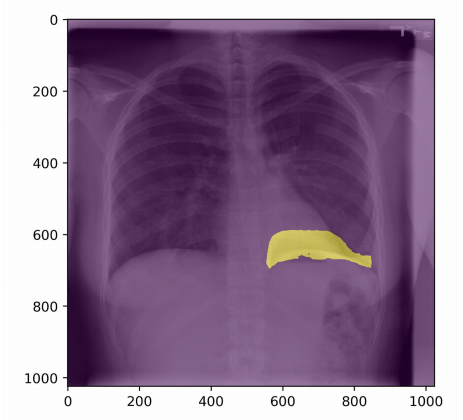


Asumimos que tenemos un número igual de radiografías.
100 radiografías con pneumothorax
100 radiografías sin pneumothorax
200 radiografías en total

Separamos nuestros datos (train_test_split) y tenemos 100 imagenes en el data set de entrenamiento y 100 imagenes en el de prueba. En los dos data sets tenemos 50 casos positivos y 50 casos negativos.



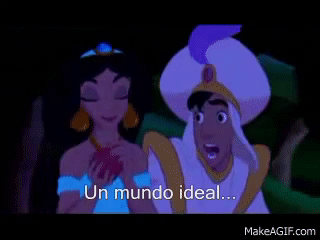

Cuando tenemos el mismo número de casos positivos y negativos en una métrica de evaluación de clasificación, generalmente usamos:
1. *accuracy*
2. *precision*
3. *recall*
4. *f1*



**Accuracy**: Es una de las métricas más sencillas de utilizar, define que tan preciso es un modelo. Sí generamos un modelo que clasifique 90 radiografías de manera correcta, nuestro **accuracy_score** es de 90% o de 0.90. Sí solo 83 imagenes son clasificadas de manera correcta, tenemos un **accuracy_score** de 83% o 0.83 

In [ ]:
from sklearn import metrics
import pandas as pd
import numpy as np

y_pred = [0, 1, 0, 1, 1 ]
y_test = [0, 1, 0, 1, 1 ]
metrics.accuracy_score(y_test, y_pred)

1.0

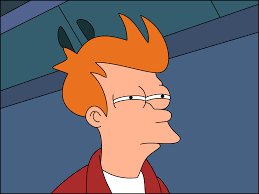

Ahora supongamos que no tenemos este hermoso dataset con el mismo número de observaciones. Ahora tenemos 180 radiografías que no tienen pneumothorax y 20 que sí lo tienen. Separamos nuestros datos en partes iguales 90 sín pneumothorax y 10 con pneumothorax en cada uno de nuestros datasets de prueba y entrenamiento.

Si tenemos más observaciones de uno de los **targets** significa que nuestros datos están sesgados, por lo que utilizar **accuracy score** puede ser engañoso ya que nuestro modelo puede tener un buen accuracy y fallar al ver datos nuevos.

Para estos casos es mejor utilizar otra métrica llamada **precision**

Antes de hablar de **precision** necesitamos conocer unos terminos de la matriz de confusión, primero vamos a definir nuestras etiquetas. Radiografías con pneumotorax van a ser un (1) y las que no lo tienen (0)

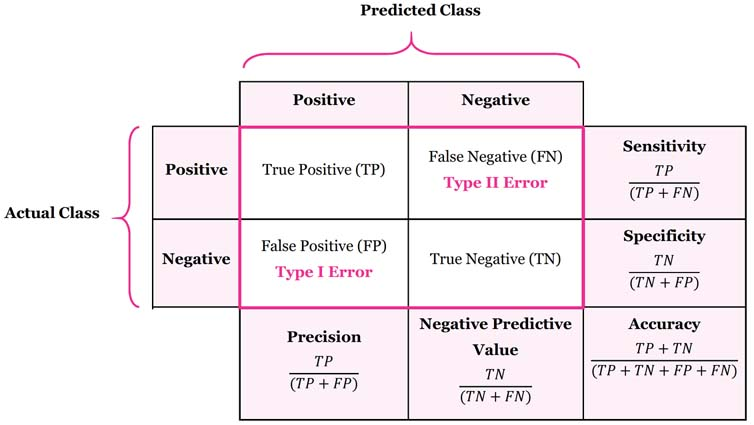}

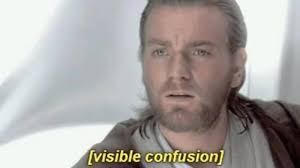

**True Positive (TP)**: Dada una radiografía, sí el modelo predice que la radiografía tiene pneumothorax, y el target actual para esa imagen tiene pneumothorax, es considerado un **verdadero positivo** (TP)

**True Negative (TN)**: Dada una radiografía, sí el modelo predice que la radiografía no tiene pneumothorax, y el target actual para esa imagen no tiene pneumothorax, es considerado un **verdadero negativo** (TN)

En palabras sencillas, sí tu modelo predice correctamente la etiqueta positiva (1) es un verdadero positivo y sí predice correctamente la etiqueta negativa (0) es un falso

**False positive (FP)**: Dada una radiografía, sí el modelo predice que la radiografía tiene pneumothorax, y el target actual para esa imagen no tiene pneumothorax, es considerado un **falso positivo** (FP)

**False negativo (FN)**: Dada una radiografía, sí el modelo predice que la radiografía no tiene pneumothorax, y el target actual para esa imagen sí tiene pneumothorax, es considerado un **falso negativo** (FN)

En palabras sencillas, sí tu modelo predice incorrectamente la etiqueta positiva(1), es un falso positivo. sí tu modelo predice incorrectamente la etiqueta negativa(0), es un falso negativo

**Precision** = $\frac{TP}{TP + FP}$

Revisamos el modelo que creamos anteriormente y vemos que tenemos los siguientes datos:

**TP** : 8

**TN** : 80

**FP** : 10

**FN** : 2

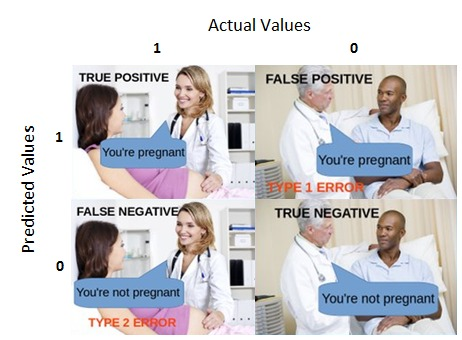

In [ ]:
matriz_confusion = pd.DataFrame([[8,2],[10,80]],index=['Positivo_act','Negativo_act'],columns=['positivo_pred','negativo_pred'])
matriz_confusion

,positivo_pred,negativo_pred
Positivo_act,8,2
Negativo_act,10,80


In [ ]:
precision = 8/(8+10)
precision

0.4444444444444444

Funciones para calcular TP, TN, FP, FN

In [ ]:
def true_positive(y_true, y_pred):

  tp=0
  for yt, yp in zip(y_true,y_pred):
    if yt == 1 and yp ==1:
      tp +=1
  return tp 

In [ ]:
y_true=[1,0,1,0,1]
y_pred=[1,1,0,1,1]

true_positive(y_true, y_pred)

2

In [ ]:
def false_positive(y_true, y_pred):

  fp=0
  for yt, yp in zip(y_true,y_pred):
    if yt == 0 and yp ==1:
      fp +=1
  return fp

y_true=[1,0,1,0,1]
y_pred=[1,0,0,1,1]

false_positive(y_true, y_pred)

1

In [ ]:
def false_negative(y_true, y_pred):

  fn=0
  for yt, yp in zip(y_true,y_pred):
    if yt == 1 and yp ==0:
      fn +=1
  return fn

y_true=[1,0,1,0,1]
y_pred=[1,0,0,1,1]

false_negative(y_true, y_pred)

1

In [ ]:
metrics.accuracy_score(y_true, y_pred)

0.6

In [ ]:
def precision(y_true, y_pred):
  """
  Function to calculate precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number precision score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  pres = tp / (tp + fp)
  return pres
  
precision(y_true,y_pred)  

0.6666666666666666

La siguiente métrica de evaluación es **recall** o **sensitivity**

$Recall = \frac{TP}{(TP+FN)}$

In [ ]:
def recall(y_true, y_pred):
  """
  Function to calculate recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number recall score
  """
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  rec = tp / (tp + fn)
  return rec
  
recall(y_true,y_pred)  

0.6666666666666666

Para considerar a un modelo como "bueno" debemos tener **precision** y **recall** con valores altos. Ya que queremos evitar tener falsos positivos y falsos negativos, mejor conocidos como error de tipo 1 y error de tipo 2

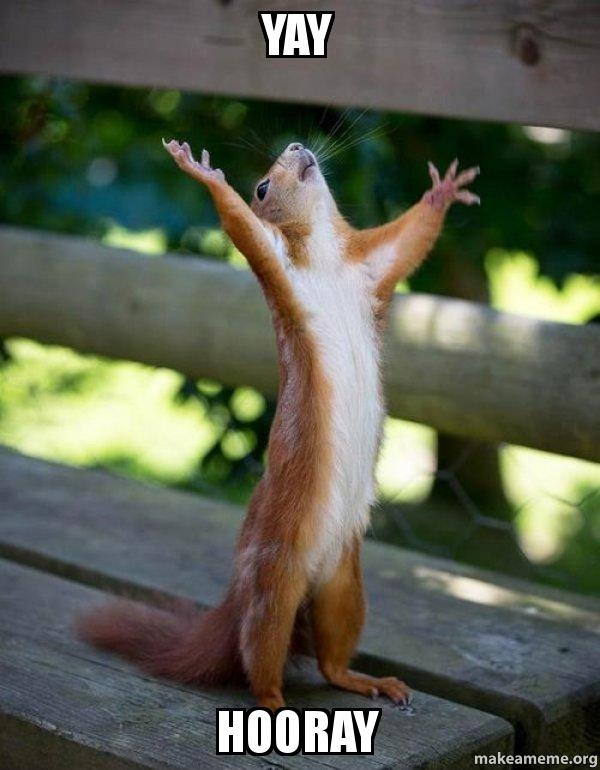

La siguiente métrica de evaluación es **F1 SCORE**, está métrica combina **precision** y **recall** y es definida como el peso promedio de la **precision** y **recall**

Para la formula vamos a definir lo siguiente:

**precision = P**

**recall = R**


$F1 = \frac{2PR}{(P + R)}$

In [ ]:
def f1(y_true, y_pred):
  """
  Function to calculate recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number recall score
  """
  numerador = 2* precision(y_true, y_pred)* recall(y_true,y_pred)
  denom = precision(y_true, y_pred)+ recall(y_true,y_pred)
  fscore = numerador/denom
  return fscore
  
f1(y_true,y_pred)  

0.6666666666666666

In [ ]:
metrics.f1_score(y_true, y_pred)

0.6666666666666666

Recordando.... F1 score nos sirve para cuando tenemos datos sesgados y la métrica **accuracy** nos puede engañar

La siguiente métrica de evaluación es **Receiver Operating Characteristic (ROC)**

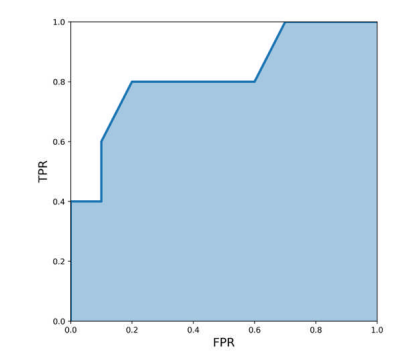

Como podemos ver en la gráfica la curva se compone de **TPR True Positive Rate** que es lo mismo que el **recall** o **sensitivity**  en el eje Y y en el eje X tenemos **FPR False Positive Rate** o **specificity** 



$FPR = \frac{TN}{(TN + FP)}$  


Cuando calculamos ROC al mismo tiempo estamos calculado otra métrica que se llama 

**AUC Area under the curve** 

In [ ]:
print(y_true)

[1, 0, 1, 0, 1]


In [ ]:
print(y_pred)

[1, 0, 0, 1, 1]


In [ ]:
metrics.roc_auc_score(y_true,y_pred)

0.5833333333333333

Los valores **AUC** se miden de 0 a 1:

1.    **AUC = 1** implica que tenemos un modelo perfecto, la mayor parte de las veces significa que cometiste un error. Revisa bien los datos de validación y sí no ves algo raro, **FELICIDADES** tienes el mejor modelo posible para el dataset sobre el cúal lo generaste
2.   **AUC = 0** implica que el modelo es muy malo(o muy bueno!), intenta invirtiendo las probabilidades de las predicciones, por ejemplo, si tu probabilidad de obtener la etiqueta positiva (1) es $p$, substituyela por $1-p$. Este resultado de **AUC** tambien implica que existe un problema con la validación de tus datos
3.   **AUC = 0.5** implica que las predicciones son aleatorias
4.   **0.5 > AUC > 0** tu modelo es peor que lanzar una moneda y tomar una decisión, esto sucede porque las mayoría de las veces las etiquetas están invertidas (1) (0), invierte estas etiquetas y vuelve a utilizar **AUC**


¿Qué nos dice **AUC** del modelo?
Supongamos que tenemos un **AUC** de 85% cuando construimos el modelo para detectar pneumothorax, esto significa que sí sacamos una imagen de manera aleatoria del dataset de pneumothorax (1) y otra imagen aleatoria del dataset pneumothorax (0), a imagen de pneumothorax tendrá una clasificación más alta que una imagen sin pneumothorax con una probabilidad de 0,85

**AUC NOS AYUDA A ELEGIR EL TRESHOLD**


$Prediction = Probability >= Threshold$

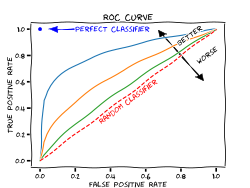


**INFORMACIÓN QUE CURA**


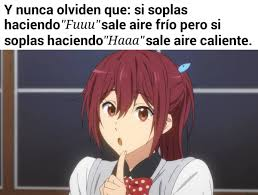



## Problemas de clasificación multi-clase

Las métricas que vimos en la clasificación binaria se pueden convertir a una versión multiclase.

Por ejemplo podemos calcular **precision** y **recall** para cada clase en un problema de clasificación multiclase

**Multi- class precision**

Sabemos que la **precision** depende de los verdaderos positivos (TP) y los falsos positivos (FP)

Tenemos 3 formas diferentes de usar **precision** en un problema de clasificación multi-clase

**Macro averaged precision**: calcula **precision** para todas las clases de manera individual y luego las promedia

**Micro averaged precision**: calcula los veraderos positivos y los falsos positivos para cada clase y luego usa esos calculos para obtener la **precision**

**Weighted precision**: igual que la macro, pero en este caso calcula la media ponderada



In [ ]:
y_true = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
y_pred = [0, 1, 2, 1, 1, 2, 2, 1, 2, 0]

In [ ]:
metrics.precision_score(y_true, y_pred, average='macro')

0.8333333333333334

In [ ]:
metrics.precision_score(y_true, y_pred, average='micro')

0.8

In [ ]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.85

In [ ]:
metrics.precision_score(y_true, y_pred, average=None)

array([1.  , 0.75, 0.75])

Podemos hacer lo mismo para **recall** y **f1_score**

In [ ]:
metrics.recall_score(y_true, y_pred, average ='macro')

0.8333333333333334

In [ ]:
metrics.recall_score(y_true, y_pred, average ='micro')

0.8

In [ ]:
metrics.recall_score(y_true, y_pred, average ='weighted')

0.8

In [ ]:
metrics.f1_score(y_true, y_pred, average ='macro')

0.7936507936507936

## Metricas para evaluar modelos de regresión

$Error = TrueValue - Predicted Value$

$Error Absoluto = abs(Error)$

**(MAE) Mean absolute error**: Es el promedio de todos los errores absolutos.

Buscamos tener un error cercano a 0

In [ ]:
def mean_absolute_error(y_true, y_pred):
  """
  This functions calculates mae
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: mean absolute error
  """
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += np.abs(yt - yp)
  
  return error / len(y_true)

y_true = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_pred = [1, 2, 3, 4, 5, 6, 7, 8, 1, 10]

mean_absolute_error(y_true, y_pred)

0.8

**(MSE) Mean squared error** : Es el promedio de todos los errores elevados al cuadrado


In [ ]:
def mean_squared_error(y_true, y_pred):
  """
  This functions calculates mae
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: mean absolute error
  """
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += (yt - yp) ** 2
  
  return error / len(y_true)

y_true = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_pred = [1, 2, 3, 4, 5, 6, 7, 8, 8, 10]

mean_squared_error(y_true, y_pred)

0.1

**(RMSE) Root mean squared error** : Es la raíz cuadrada de MSE

In [ ]:
from math import sqrt
sqrt(mean_squared_error(y_true, y_pred))

0.31622776601683794

**Percentage Error** = $(\frac{(TrueValue - PredictedValue)}{True Value})*100$

**(MPE) Mean percentage error** : el promedio de los percentage error

**(MAPE) Mean absolute percentage error**: Es el promedio absoluto de los percentage error

**Coeficiente de determinación o $R^{2}$**

En palabras sencillas el coeficiene de determinación nos dice que tan bien se ajusta el modelo a los datos, Un score $R^{2}$ cercano a 1 nos dice que el modelo ajusta bien a los datos, y cuando es cercano a 0 quiere decir que el modelo no es tan bueno, podemos obtener un score negativo lo que significa que el modelo está haciendo predicciones absurdas.





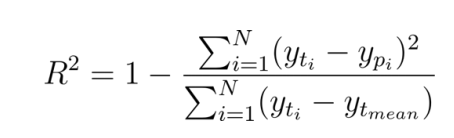

In [ ]:
metrics.r2_score(y_true,y_pred)

0.9878787878787879